# 0.0 Imports

In [114]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import random

from sklearn import metrics as mt

from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree as tr
from sklearn import ensemble as en
from sklearn import linear_model as lm
from sklearn import preprocessing as pp
from sklearn import cluster as ct
from yellowbrick.cluster import KElbowVisualizer

## 0.1 Functions

In [2]:
def __roc_curve__(y_real,y_hat):
    fpr,tpr,thresholds=mt.roc_curve(y_real,y_hat)
    return mt.auc(fpr,tpr)

def __clas_metrics__(y_real,y_hat,model):
    model_name=model
    acc=mt.accuracy_score(y_real,y_hat)
    precision=mt.precision_score(y_real,y_hat,pos_label = 1)
    recall=mt.recall_score(y_real,y_hat,pos_label = 1)
    f1_score=mt.f1_score(y_real,y_hat,pos_label = 1)
    metrics=pd.DataFrame([model_name,acc,precision,recall,f1_score]).T
    metrics.columns=['Algorithm','Accuracy','Precision','Recall','F1 Score']
    return metrics

def __reg_metrics__(y_real,y_hat,model):
    model_name=model
    r2_score=mt.r2_score(y_real,y_hat)
    mse=mt.mean_squared_error(y_real,y_hat)
    rmse=np.sqrt(mse)
    mae=mt.mean_absolute_error(y_real,y_hat)
    mape=mt.mean_absolute_percentage_error(y_real,y_hat)
    metrics=pd.DataFrame([model,r2_score,mse,rmse,mae,mape]).T
    metrics.columns=('Algorithm','R2_Score','MSE','RMSE','MAE','MAPE')
    return metrics 
    
def __random_search__(parameters):
    return {k:random.sample(v,1)[0] for k, v in parameters.items()}

# 1.0 Classification Algorithms

In [21]:
# Load dataset
os.chdir('../datasets/classification')
X_train=pd.read_csv('X_training.csv',low_memory=False)
X_val=pd.read_csv('X_validation.csv',low_memory=False)
X_test=pd.read_csv('X_test.csv',low_memory=False)
y_train=pd.read_csv('y_training.csv',low_memory=False)
y_val=pd.read_csv('y_validation.csv',low_memory=False)
y_test=pd.read_csv('y_test.csv',low_memory=False)

## 1.1 KNN (K-Nearest Neighbor)

In [65]:
# Model Define - Default hyperparameters
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
# Predict over training dataset
y_pred_train=knn.predict(X_train)
knn_train=__clas_metrics__(y_train,y_pred_train,'KNN')
# Predict over validation dataset
y_pred_val=knn.predict(X_val)
knn_val=__clas_metrics__(y_val,y_pred_val,'KNN')

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

Text(0, 0.5, 'AUC')

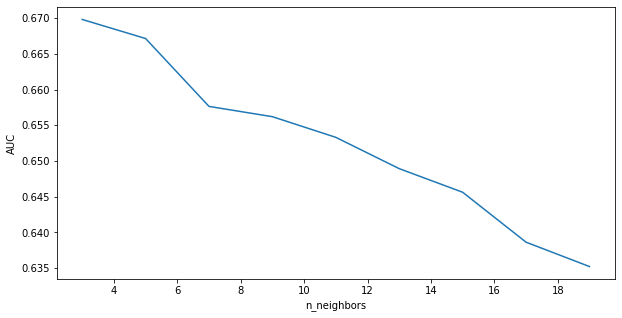

In [69]:
# Hyperparameter fine tuning - n_neighbors
n_neighbors_list=[]
auc_list=[]
for i in range(3,20,2):
    knn=KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train);
    y_hat=knn.predict(X_val)
    auc_list.append(__roc_curve__(y_val,y_hat))
    n_neighbors_list.append(i)
plt.figure(figsize=(10,5))
plt.plot(n_neighbors_list,auc_list)
plt.xlabel('n_neighbors'),
plt.ylabel('AUC')

In [70]:
# Final model - n_neighbors=3
knn_final=KNeighborsClassifier(n_neighbors=3)
knn_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=knn_final.predict(X_test)
knn_test=__clas_metrics__(y_test,y_hat,'KNN')

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 1.2 Decision Tree Classifier

In [55]:
# Model define - default hyperparameters
dt_clas=tr.DecisionTreeClassifier()
dt_clas.fit(X_train,y_train)
# Performance over training dataset
y_pred_train=dt_clas.predict(X_train)
dt_train=__clas_metrics__(y_train,y_pred_train,'Decision Tree')
# Performance over validation dataset
y_pred_val=dt_clas.predict(X_val)
dt_val=__clas_metrics__(y_val,y_pred_val,'Decision Tree')

# Hyperparameter fine tuning - max_depth
auc_list=[]
max_depth_list=[]
for i in range(1,40,1):
    dt_clas=tr.DecisionTreeClassifier(max_depth=i)
    dt_clas.fit(X_train,y_train)
    y_hat=dt_clas.predict(X_val)
    auc_list.append(__roc_curve__(y_val,y_hat))
    max_depth_list.append(i)
plt.figure(figsize=(10,5))
plt.plot(max_depth_list,auc_list)
plt.xlabel('max_depth'),
plt.ylabel('AUC')

In [62]:
# Final model - max_depth=15
dt_final=tr.DecisionTreeClassifier(max_depth=15)
dt_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=dt_final.predict(X_test)
dt_test=__clas_metrics__(y_test,y_hat,'Decision Tree')

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 1.3 Random Forest Classifier

In [74]:
# Model define - default hyperparameters
rf_clas = en.RandomForestClassifier()
rf_clas.fit(X_train,y_train)
# Performance over training dataset
y_pred_train=rf_clas.predict(X_train)
rf_train=__clas_metrics__(y_train,y_pred_train,'Random Forest')
# Performance over validation dataset
y_pred_val=rf_clas.predict(X_val)
rf_val=__clas_metrics__(y_val,y_pred_val,'Random Forest')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [82]:
# Hyperparameters fine tunning - n_estimators,max_depth
parameters={'n_estimators':[10,50,100,200],
            'max_depth':[5,10,20,30,40]}
auc_list=[]
parameters_list=[]
for i in range(10):
    hp=__random_search__(parameters)
    rf_clas=en.RandomForestClassifier(n_estimators = hp['n_estimators'],
                                      max_depth = hp['max_depth'])
    rf_clas.fit(X_train,y_train)
    y_hat=rf_clas.predict(X_val)
    auc_list.append(__roc_curve__(y_val,y_hat))
    parameters_list.append(hp)
fine_tuning_results=pd.DataFrame([parameters_list,auc_list]).T
fine_tuning_results.columns=['Hyperparameters','AUC']

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [96]:
fine_tuning_results

,Hyperparameters,AUC
0,"{'n_estimators': 100, 'max_depth': 10}",0.948034
1,"{'n_estimators': 10, 'max_depth': 5}",0.912009
2,"{'n_estimators': 10, 'max_depth': 5}",0.917568
3,"{'n_estimators': 50, 'max_depth': 10}",0.949952
4,"{'n_estimators': 200, 'max_depth': 20}",0.961745
5,"{'n_estimators': 50, 'max_depth': 10}",0.947958
6,"{'n_estimators': 50, 'max_depth': 10}",0.948224
7,"{'n_estimators': 50, 'max_depth': 10}",0.948464
8,"{'n_estimators': 200, 'max_depth': 10}",0.947705
9,"{'n_estimators': 10, 'max_depth': 30}",0.957257


In [103]:
# Final model - 'n_estimators': 200, 'max_depth': 20
rf_final = en.RandomForestClassifier(n_estimators=200,
                                     max_depth=20)
rf_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=rf_final.predict(X_test)
rf_test=__clas_metrics__(y_test,y_hat,'Random Forest')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 1.4 Logistic Regression

In [106]:
# Model define - default hyperparameters
log = lm.LogisticRegression()
log.fit(X_train,y_train)
# Predict over training dataset
y_pred_train=log.predict(X_train)
log_train=__clas_metrics__(y_train,y_pred_train,'Logistic Regression')
# Predict over validation dataset
y_pred_val=log.predict(X_val)
log_val=__clas_metrics__(y_val,y_pred_val,'Logistic Regression')

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
# Hyperparameters fine tuning - C,solver,max_iter
parameters = {'C':[0.1,0.3,0.5,0.7,1.0],
              'solver':['lbfgs','liblinear','sag','saga'],
              'max_iter':[100,500,1000,2000]}
auc_list = []
parameters_list=[]
for i in range(10):
    hp=__random_search__(parameters)
    log=lm.LogisticRegression(C = hp['C'],
                              solver = hp['solver'],
                              max_iter = hp['max_iter']);
    log.fit(X_train,y_train);
    y_hat = log.predict(X_val);
    auc_list.append(__roc_curve__(y_val,y_hat))
    parameters_list.append(hp)
log_fine_tuning=pd.DataFrame([parameters_list,auc_list]).T
log_fine_tuning.columns=['Hyperparameters','AUC']

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\li

In [145]:
log_fine_tuning

,Hyperparameters,AUC
0,"{'C': 0.5, 'solver': 'liblinear', 'max_iter': ...",0.836172
1,"{'C': 0.7, 'solver': 'sag', 'max_iter': 500}",0.502655
2,"{'C': 0.7, 'solver': 'liblinear', 'max_iter': ...",0.836183
3,"{'C': 1.0, 'solver': 'sag', 'max_iter': 500}",0.502655
4,"{'C': 0.1, 'solver': 'liblinear', 'max_iter': ...",0.798887
5,"{'C': 0.7, 'solver': 'sag', 'max_iter': 500}",0.502655
6,"{'C': 0.1, 'solver': 'liblinear', 'max_iter': ...",0.798887
7,"{'C': 0.7, 'solver': 'saga', 'max_iter': 500}",0.502363
8,"{'C': 1.0, 'solver': 'sag', 'max_iter': 500}",0.502655
9,"{'C': 0.5, 'solver': 'lbfgs', 'max_iter': 500}",0.5


In [143]:
# Final model - 'C': 0.7, 'solver': 'liblinear', 'max_iter': 500
log_final=lm.LogisticRegression(C = 0.7,
                                solver='liblinear',
                                max_iter=500)
log_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=log_final.predict(X_test)
log_test=__clas_metrics__(y_test,y_hat,'Logistic Regression')

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [144]:
log_test

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.641216,0.629801,0.442939,0.520095


## 1.5 Results Summary

In [166]:
# Prediction over training dataset
train_pred_clas=pd.concat([knn_train,dt_train,rf_train,log_train])
train_pred_clas

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,KNN,0.781562,0.755893,0.732563,0.744046
0,Decision Tree,1,1,1,1
0,Random Forest,1,1,1,1
0,Logistic Regression,0.5666,0,0,0


In [149]:
# Prediction over validation dataset
train_val_clas=pd.concat([knn_val,dt_val,rf_val,log_val])
train_val_clas

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,KNN,0.675665,0.631775,0.603163,0.617138
0,Decision Tree,0.945333,0.935345,0.938748,0.937044
0,Random Forest,0.964478,0.973573,0.943648,0.958377
0,Logistic Regression,0.566621,0,0,0


In [154]:
# Prediction over test dataset
train_test_clas=pd.concat([knn_test,dt_test,rf_test,log_test])
train_test_clas

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,KNN,0.688449,0.648025,0.635196,0.641546
0,Decision Tree,0.954853,0.952432,0.944303,0.94835
0,Random Forest,0.965628,0.973853,0.947118,0.9603
0,Logistic Regression,0.641216,0.629801,0.442939,0.520095


# 2.0 Regression Algorithms

In [8]:
os.chdir('../datasets/regression')
X_test=pd.read_csv('X_test.csv',low_memory=False)
X_val=pd.read_csv('X_validation.csv',low_memory=False)
X_train=pd.read_csv('X_training.csv',low_memory=False)
y_test=pd.read_csv('y_test.csv',low_memory=False)
y_val=pd.read_csv('y_val.csv',low_memory=False)
y_train=pd.read_csv('y_training.csv',low_memory=False)

## 2.1 Decision Tree Regressor

In [9]:
# Model define - Default hyperparameters
dt_reg=tr.DecisionTreeRegressor()
dt_reg.fit(X_train,y_train)
# Predict over training dataset
y_pred_train=dt_reg.predict(X_train)
dt_reg_train=__reg_metrics__(y_train,y_pred_train,'Decision Tree Regressor')
# Predict over validation dataset
y_pred_val=dt_reg.predict(X_val)
dt_reg_val=__reg_metrics__(y_val,y_pred_val,'Decision Tree Regressor')

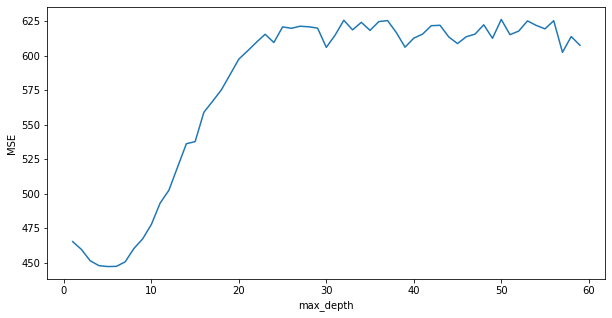

In [10]:
# Hyperparameter fine tuning - max_depth
mse_list=[]
max_depth_list=[]
for i in range(1,60):
    dt_reg=tr.DecisionTreeRegressor(max_depth=i)
    dt_reg.fit(X_train,y_train)
    y_hat=dt_reg.predict(X_val)
    mse_list.append(mt.mean_squared_error(y_val,y_hat))
    max_depth_list.append(i)
plt.figure(figsize=(10,5));
plt.plot(max_depth_list,mse_list)
plt.xlabel('max_depth');
plt.ylabel('MSE');

In [11]:
# Final model - max_depth=5
dt_reg_final=tr.DecisionTreeRegressor(max_depth=5)
dt_reg_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=dt_reg_final.predict(X_test)
dt_reg_test=__reg_metrics__(y_test,y_hat,'Decision Tree Regressor')

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 2.2 Random Forest Regressor

In [12]:
# Model define - Default hyperparameters
rf_reg=en.RandomForestRegressor()
rf_reg.fit(X_train,y_train)
# Predict over training dataset
y_pred_train=rf_reg.predict(X_train)
rf_reg_train=__reg_metrics__(y_train,y_pred_train,'Random Forest Regressor')
# Predict over validation dataset
y_pred_val=rf_reg.predict(X_val)
rf_reg_val=__reg_metrics__(y_val,y_pred_val,'Random Forest Regressor')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
# Hyperparameter fine tuning - n_estimators,max_depth
parameters={'n_estimators':[10,50,100,200],
            'max_depth':[5,10,20,30,40]}
mse_list=[]
parameters_list=[]
for i in range(10):
    hp=__random_search__(parameters)
    rf_reg=en.RandomForestRegressor(n_estimators=hp['n_estimators'],
                                     max_depth=hp['max_depth'])
    rf_reg.fit(X_train,y_train)
    y_hat=rf_reg.predict(X_val)
    mse_list.append(mt.mean_squared_error(y_val,y_hat))
    parameters_list.append(hp)
fine_tuning_results=pd.DataFrame([parameters_list,mse_list]).T
fine_tuning_results.columns=['Hyperparameters','MSE']

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

In [35]:
fine_tuning_results

,Hyperparameters,MSE
0,"{'n_estimators': 10, 'max_depth': 20}",350.106
1,"{'n_estimators': 10, 'max_depth': 5}",432.396
2,"{'n_estimators': 100, 'max_depth': 5}",430.374
3,"{'n_estimators': 100, 'max_depth': 40}",318.616
4,"{'n_estimators': 50, 'max_depth': 30}",324.969
5,"{'n_estimators': 10, 'max_depth': 5}",432.974
6,"{'n_estimators': 50, 'max_depth': 40}",321.404
7,"{'n_estimators': 10, 'max_depth': 30}",349.773
8,"{'n_estimators': 10, 'max_depth': 30}",348.154
9,"{'n_estimators': 200, 'max_depth': 20}",317.23


In [36]:
# Final model - 'n_estimators': 200, 'max_depth': 20
rf_reg_final=en.RandomForestRegressor(n_estimators=200,
                                      max_depth=20)
rf_reg_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=rf_reg_final.predict(X_test)
rf_reg_test=__reg_metrics__(y_test,y_hat,'Random Forest Regressor')

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 2.3 Linear Regression Lasso

In [43]:
# Model define - Default hyperparameters
lasso=lm.Lasso()
lasso.fit(X_train,y_train)
# Predict over training dataset
y_pred_train=lasso.predict(X_train)
lasso_train=__reg_metrics__(y_train,y_pred_train,'Linear Regression Lasso')
# Predict over validation dataset
y_pred_val=lasso.predict(X_val)
lasso_val=__reg_metrics__(y_val,y_pred_val,'Linear Regression Lasso')

In [52]:
# Hyperparameter fine tuning - alpha,max_iter
parameters = {'alpha':[1e-3,1e-2,1e-1,0.5,1.0],
              'max_iter':[1000,2000,5000,10000]}
parameters_list=[]
mse_list=[]
for i in range(20):
    hp=__random_search__(parameters)
    lasso=lm.Lasso(alpha=hp['alpha'],
                   max_iter=hp['max_iter'])
    lasso.fit(X_train,y_train)
    y_hat=lasso.predict(X_val)
    mse_list.append(mt.mean_squared_error(y_val,y_hat))
    parameters_list.append(hp)
fine_tuning_results=pd.DataFrame([parameters_list,mse_list]).T
fine_tuning_results.columns=['Hyperparameters','MSE']

In [55]:
fine_tuning_results

,Hyperparameters,MSE
0,"{'alpha': 0.1, 'max_iter': 5000}",459.75
1,"{'alpha': 1.0, 'max_iter': 1000}",473.747
2,"{'alpha': 0.5, 'max_iter': 2000}",472.563
3,"{'alpha': 0.001, 'max_iter': 10000}",458.441
4,"{'alpha': 0.5, 'max_iter': 1000}",472.563
5,"{'alpha': 0.01, 'max_iter': 10000}",458.445
6,"{'alpha': 0.5, 'max_iter': 5000}",472.563
7,"{'alpha': 0.01, 'max_iter': 10000}",458.445
8,"{'alpha': 0.001, 'max_iter': 2000}",458.441
9,"{'alpha': 1.0, 'max_iter': 5000}",473.747


In [56]:
# Final model - 'alpha': 0.01, 'max_iter': 2000
lasso_final=lm.Lasso(alpha=0.01,
               max_iter=2000)
lasso_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=lasso_final.predict(X_test)
lasso_test=__reg_metrics__(y_test,y_hat,'Linear Regression Lasso')

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but Lasso was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 2.4 Linear Regression Ridge

In [58]:
# Define model - Default hyperparameters
ridge=lm.Ridge()
ridge.fit(X_train,y_train)
# Predict over training dataset
y_pred_train=ridge.predict(X_train)
ridge_train=__reg_metrics__(y_train,y_pred_train,'Linear Regression Ridge')
# Predict over validation dataset
y_pred_val=ridge.predict(X_val)
ridge_val=__reg_metrics__(y_val,y_pred_val,'Linear Regression Ridge')

In [61]:
# Hyperparameter fine tuning - alpha,max_iter
parameters = {'alpha':[1e-3,1e-2,1e-1,0.5,1.0],
              'max_iter':[1000,2000,5000,10000]}
parameters_list=[]
mse_list=[]
for i in range(20):
    hp=__random_search__(parameters)
    ridge=lm.Ridge(alpha=hp['alpha'],
                   max_iter=hp['max_iter'])
    ridge.fit(X_train,y_train)
    y_hat=ridge.predict(X_val)
    mse_list.append(mt.mean_squared_error(y_val,y_hat))
    parameters_list.append(hp)
fine_tuning_results=pd.DataFrame([parameters_list,mse_list]).T
fine_tuning_results.columns=['Hyperparameters','MSE']
fine_tuning_results

,Hyperparameters,MSE
0,"{'alpha': 0.1, 'max_iter': 1000}",458.447
1,"{'alpha': 0.001, 'max_iter': 10000}",458.447
2,"{'alpha': 0.001, 'max_iter': 5000}",458.447
3,"{'alpha': 0.1, 'max_iter': 1000}",458.447
4,"{'alpha': 0.5, 'max_iter': 10000}",458.446
5,"{'alpha': 0.1, 'max_iter': 10000}",458.447
6,"{'alpha': 1.0, 'max_iter': 2000}",458.445
7,"{'alpha': 0.001, 'max_iter': 1000}",458.447
8,"{'alpha': 0.5, 'max_iter': 1000}",458.446
9,"{'alpha': 0.5, 'max_iter': 5000}",458.446


In [62]:
# Final model - Default hyperparamenters
ridge_final=lm.Ridge()
ridge_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=ridge_final.predict(X_test)
ridge_test=__reg_metrics__(y_test,y_hat,'Linear Regression Ridge')

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but Ridge was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 2.5 Linear Regression Elastic Net

In [64]:
# Define Model - Default Hyperparameters
elastic=lm.ElasticNet()
elastic.fit(X_train,y_train)
# Prediction over training dataset
y_pred_train=elastic.predict(X_train)
elastic_train=__reg_metrics__(y_train,y_pred_train,'Linear Regression Elastic Net')
# Prediction over validation dataset
y_pred_val=elastic.predict(X_val)
elastic_val=__reg_metrics__(y_val,y_pred_val,'Linear Regression Elastic Net')

In [68]:
# Hyperparameters fine tunning - alpha,l1_ratio,max_iter
parameters = {'alpha':[1e-3,1e-2,1e-1,0.5,1.0],
              'l1_ratio':[0.1,0.25,0.5,0.75,0.9],
              'max_iter':[1000,2000,5000,10000]}
parameters_list=[]
mse_list = []
for i in range(20):
    hp=__random_search__(parameters)
    elastic=lm.ElasticNet(alpha=hp['alpha'],
                          l1_ratio=hp['l1_ratio'],
                          max_iter=hp['max_iter'])
    elastic.fit(X_train,y_train)
    y_hat=elastic.predict(X_val)    
    mse_list.append(mt.mean_squared_error(y_val,y_hat))
    parameters_list.append(hp)
fine_tuning_results=pd.DataFrame([parameters_list,mse_list]).T
fine_tuning_results.columns=['Hyperparameters','MSE']
fine_tuning_results

,Hyperparameters,MSE
0,"{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': ...",458.44
1,"{'alpha': 0.001, 'l1_ratio': 0.75, 'max_iter':...",458.44
2,"{'alpha': 1.0, 'l1_ratio': 0.1, 'max_iter': 5000}",472.682
3,"{'alpha': 0.01, 'l1_ratio': 0.9, 'max_iter': 2...",458.463
4,"{'alpha': 0.5, 'l1_ratio': 0.9, 'max_iter': 1000}",472.304
5,"{'alpha': 0.01, 'l1_ratio': 0.75, 'max_iter': ...",458.509
6,"{'alpha': 0.5, 'l1_ratio': 0.5, 'max_iter': 1000}",471.528
7,"{'alpha': 1.0, 'l1_ratio': 0.25, 'max_iter': 5...",473.108
8,"{'alpha': 0.5, 'l1_ratio': 0.5, 'max_iter': 10...",471.528
9,"{'alpha': 0.001, 'l1_ratio': 0.25, 'max_iter':...",458.44


In [71]:
# Final model - 'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 1000
elastic_final=lm.ElasticNet(alpha=0.001,
                            l1_ratio=0.5,
                            max_iter=1000)
elastic_final.fit(np.concatenate((X_train,X_val)),np.concatenate((y_train,y_val)))
y_hat=elastic_final.predict(X_test)
elastic_test=__reg_metrics__(y_test,y_hat,'Linear Regression Elastic Net')

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but ElasticNet was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


## 2.6 Results Summary

In [73]:
# Prediction over training dataset
train_pred_reg=pd.concat([dt_reg_train,rf_reg_train,lasso_train,ridge_train,elastic_train])
train_pred_reg

,Algorithm,R2_Score,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,0.991757,3.9404,1.98504,0.214099,0.0826279
0,Random Forest Regressor,0.903062,46.3378,6.80719,4.87057,2.60773
0,Linear Regression Lasso,0.00740091,474.475,21.7824,17.3055,8.7367
0,Linear Regression Ridge,0.0460577,455.996,21.3541,16.9983,8.65341
0,Linear Regression Elastic Net,0.00783174,474.269,21.7777,17.2995,8.7323


In [74]:
# Prediction over validation dataset
val_pred_reg=pd.concat([dt_reg_val,rf_reg_val,lasso_val,ridge_val,elastic_val])
val_pred_reg

,Algorithm,R2_Score,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,-0.284108,613.176,24.7624,17.0678,6.8912
0,Random Forest Regressor,0.336183,316.98,17.8039,13.0133,7.06991
0,Linear Regression Lasso,0.00788364,473.747,21.7657,17.2649,8.69581
0,Linear Regression Ridge,0.0399281,458.445,21.4113,17.0395,8.68241
0,Linear Regression Elastic Net,0.00811707,473.636,21.7632,17.2629,8.69404


In [75]:
# Prediction over test dataset
test_pred_reg=pd.concat([dt_reg_test,rf_reg_test,lasso_test,ridge_test,elastic_test])
test_pred_reg

,Algorithm,R2_Score,MSE,RMSE,MAE,MAPE
0,Decision Tree Regressor,0.0904755,442.848,21.044,16.8298,7.88323
0,Random Forest Regressor,0.396554,293.818,17.1411,12.5675,6.3721
0,Linear Regression Lasso,0.0507987,462.167,21.4981,17.1453,8.54906
0,Linear Regression Ridge,0.0511669,461.988,21.4939,17.144,8.53205
0,Linear Regression Elastic Net,0.0511291,462.006,21.4943,17.1427,8.53714


# 3.0 Clustering Algorithms

In [78]:
os.chdir('../clustering')
X_train=pd.read_csv('X_dataset.csv')

## 3.1 K-Means

In [120]:
# Normlizing the scale of data
scaler=pp.StandardScaler()
X_scaled=scaler.fit_transform(X_train) 

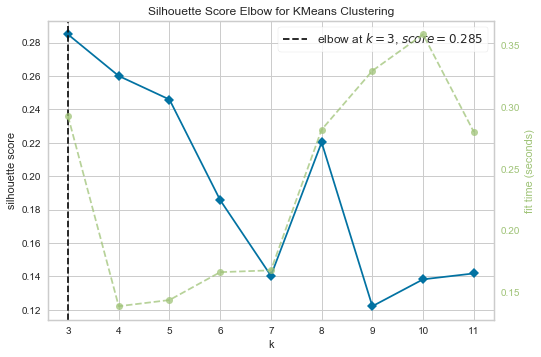

In [124]:
# Elbow Method - Optimal number of clusters
kmeans=ct.KMeans()
visualizer=KElbowVisualizer(kmeans,k=(3,12),metric='silhouette')
visualizer.fit(X_scaled)
visualizer.show()

Text(0, 0.5, 'silhouette score')

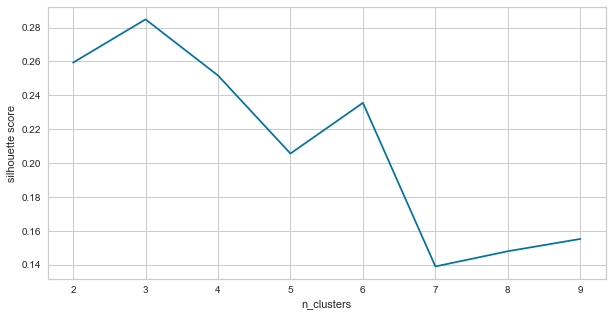

In [125]:
n_clusters_list=[]
ss_list=[]
for i in range(2,10,1):
    kmeans=ct.KMeans(n_clusters=i)
    labels=kmeans.fit_predict(X_scaled)
    ss_list.append(mt.silhouette_score(X_scaled,labels))
    n_clusters_list.append(i)
plt.figure(figsize=(10,5))
plt.plot(n_clusters_list,ss_list)
plt.xlabel('n_clusters')
plt.ylabel('silhouette score')

In [126]:
# Final model - n_clusters=3
n_clusters=3
kmeans=ct.KMeans(n_clusters=n_clusters)
labels=kmeans.fit_predict(X_scaled)
kmeans_ss=mt.silhouette_score(X_scaled,labels)
kmeans_results=pd.DataFrame(['K-Means',n_clusters,kmeans_ss]).T
kmeans_results.columns=('Algorithm','Number of Clusters','Average Silhouette Score')

## 3.2 Affinity Propagation

Text(0, 0.5, 'silhouette score')

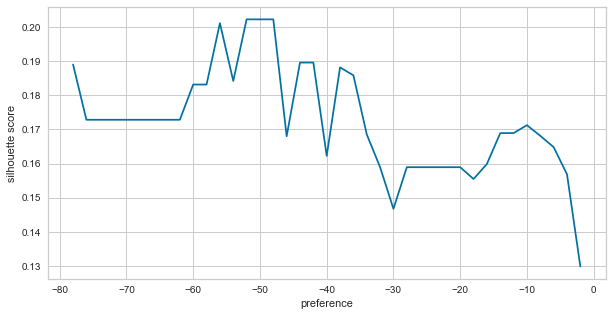

In [129]:
ss_list=[]
preference_list=[]
for i in range(-2,-80,-2):
    ap=ct.AffinityPropagation(preference=i)
    ap.fit(X_train)
    labels=ap.predict(X_train)
    ss_list.append(mt.silhouette_score(X_train,labels))
    preference_list.append(i)
plt.figure(figsize=(10,5))
plt.plot(preference_list,ss_list)
plt.xlabel('preference')
plt.ylabel('silhouette score')

In [104]:
# Final model - preference=-50
ap=ct.AffinityPropagation(preference=-50)
labels=ap.fit_predict(X_train)
ap_ss=mt.silhouette_score(X_train,labels)
n_clusters=len(ap.cluster_centers_indices_)
ap_results=pd.DataFrame(['Affinity Propagation',n_clusters,ap_ss]).T
ap_results.columns=('Algorithm','Number of Clusters','Average Silhouette Score')

## Results Summary

In [130]:
cluster=pd.concat([kmeans_results,ap_results])
cluster

,Algorithm,Number of Clusters,Average Silhouette Score
0,K-Means,3,0.284859
0,Affinity Propagation,7,0.202286
